In [1]:
import pandas as pd
from langdetect import detect
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import math
import matplotlib.pyplot as plt

In [2]:
lem = WordNetLemmatizer() #create lemmatizer

In [3]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kseniapavlina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
dictionary = pd.read_csv('../data/processedDict.csv')
dictionary

,word,cat_lev1,cat_lev2,cat_lev3,ndf
0,information,business,professional_conduct_host,advice,0.008904
1,recommendations,business,professional_conduct_host,advice,0.008375
2,tips,business,professional_conduct_host,advice,0.008399
3,advice,business,professional_conduct_host,advice,0.007568
4,suggestions,business,professional_conduct_host,advice,0.007580
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moments,social,social_interaction,talking,0.001155
350,chats,social,social_interaction,talking,0.000553


In [5]:
dictionary[70:]

,word,cat_lev1,cat_lev2,cat_lev3,ndf
70,welcome,business,professional_conduct_host,personality_host2,0.009818
71,responsive,business,professional_conduct_host,personality_host2,0.009638
72,help,business,professional_conduct_host,personality_host2,0.008736
73,welcomed,business,professional_conduct_host,personality_host2,0.008543
74,needs,business,professional_conduct_host,personality_host2,0.008567
...,...,...,...,...,...
347,talking,social,social_interaction,talking,0.001961
348,chatting,social,social_interaction,talking,0.001408
349,moments,social,social_interaction,talking,0.001155
350,chats,social,social_interaction,talking,0.000553


In [6]:
dictionary['word'] = dictionary['word'].apply(lambda x: lem.lemmatize(x, pos='n'))

In [7]:
filepath = '../data/en_reviews/Manchester.csv'
reviews = pd.read_csv(filepath)

# reviews = reviews['date']
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
0,0,68951,993691,2012-03-12,1602133,Leopoldo,Comfy and cosy space with a welcome survival k...,en
1,1,68951,1305184,2012-05-19,2093255,Deepthi,We stayed with Paul for 2 nights on a business...,en
2,2,68951,1369794,2012-05-29,337778,Graham,What a fantastic place. We stayed for a week ...,en
3,3,68951,1470176,2012-06-12,1829716,Kira,The house is very comfortable and the hosts ar...,en
4,4,68951,1607783,2012-07-02,323672,Peter,My friends and I had a great stay at Paul and ...,en
...,...,...,...,...,...,...,...,...
132579,144022,42135683,604472776,2020-02-11,326617985,Effanga,Steve's place is quite basic but had everythin...,en
132580,144023,42135683,605332428,2020-02-14,30514766,Gökçe,It was great experience. It is quite and big r...,en
132581,144024,42135683,605817713,2020-02-15,103013271,Rich,Was beyond my expectations and super friendly,en
132582,144026,42167098,606283081,2020-02-16,221655974,Karl,"Well thought out character property, extremely...",en


In [8]:
table = str.maketrans('', '', string.punctuation) #mapping to strip punctuation in review

In [9]:
#strip punct of each review -> lemmatise -> output is list of words so join into sentences
reviews['comments'] = reviews.comments.apply(lambda review: ' '.join(map(str, [lem.lemmatize(word.translate(table), pos='n') for word in review.lower().split()])))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
0,0,68951,993691,2012-03-12,1602133,Leopoldo,comfy and cosy space with a welcome survival k...,en
1,1,68951,1305184,2012-05-19,2093255,Deepthi,we stayed with paul for 2 night on a business ...,en
2,2,68951,1369794,2012-05-29,337778,Graham,what a fantastic place we stayed for a week an...,en
3,3,68951,1470176,2012-06-12,1829716,Kira,the house is very comfortable and the host are...,en
4,4,68951,1607783,2012-07-02,323672,Peter,my friend and i had a great stay at paul and d...,en
...,...,...,...,...,...,...,...,...
132579,144022,42135683,604472776,2020-02-11,326617985,Effanga,steves place is quite basic but had everything...,en
132580,144023,42135683,605332428,2020-02-14,30514766,Gökçe,it wa great experience it is quite and big roo...,en
132581,144024,42135683,605817713,2020-02-15,103013271,Rich,wa beyond my expectation and super friendly,en
132582,144026,42167098,606283081,2020-02-16,221655974,Karl,well thought out character property extremely ...,en


In [10]:
reviews['date'] = pd.to_datetime(reviews['date'])

In [11]:
#### DELETE THIS LATER ###
mask = (reviews['date'] > '2014-01-01') & (reviews['date'] < '2015-01-01')
reviews = reviews.loc[mask].copy()
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en
...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en


In [12]:
allwords = reviews['comments'].tolist()
allwords = " ".join(allwords)
unique_words = set(allwords.split(' '))
len(unique_words)

3987

In [13]:
unique_words = list(unique_words)
unique_words = [string for string in unique_words if string != ""]
len(unique_words)

3986

In [14]:
unique_words[2]

'dolan'

In [15]:
# unique_words = " ".join(unique_words)

In [16]:
# import math
# def getNom(word, review):
#     nom = 1
    

In [17]:
# import math
# def logTermFrequency(word, review):
#     totalNumberOfWords = review.split()
#     totalNumberOfWords = len(totalNumberOfWords)
#     numberOfWord = math.log(1 + review.count(word))
#     if numberOfWord == 0:
#         return 0;
#     result = numberOfWord * 100/ totalNumberOfWords
#     return result   

In [18]:
math.log10(2)

0.3010299956639812

In [79]:
import math
def getDenom(review, unique_words):
    den = 0
    ls = []
    for word in unique_words:
        if (review.count(word) > 0 and word not in ls):
            ls += [word]
            den += math.log(1 + review.count(word))
    return den

In [80]:
reviews['den'] = reviews['comments'].apply(lambda x: getDenom(x, unique_words))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [81]:
def getNom(category, review, dictionary):
    nom = 0
    dictionaryWords = dictionary[(dictionary['cat_lev3'] == category)]
    dictionaryWords = dictionaryWords['word']
    for word in dictionaryWords:
        nom += math.log(1 + review.count(word))
    return nom

In [82]:
# reviews1

In [83]:
reviews['meal0'] = reviews['comments'].apply(lambda x: getNom('meal', x, dictionary))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [84]:
reviews['meal'] = reviews['meal0']*100/reviews['den']
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [85]:
reviews['people0'] = reviews['comments'].apply(lambda x: getNom('people', x, dictionary))
reviews['people'] = reviews['people0']*100/reviews['den']
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [86]:
# reviews1['meal'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('meal', x, dictionary, unique_words))

In [87]:
k_meal = reviews['meal'].loc[reviews['meal'] > 0]
k_meal = k_meal.min()
print(k_meal)

0.16064667603704924


In [88]:
reviews['personality_host0'] = reviews['comments'].apply(lambda x: getNom('personality_host', x, dictionary))
reviews['personality_host'] = reviews['personality_host0']*100/reviews['den']

In [89]:
reviews['personality_host20'] = reviews['comments'].apply(lambda x: getNom('personality_host2', x, dictionary))
reviews['personality_host2'] = reviews['personality_host20']*100/reviews['den']

In [90]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [91]:
# reviews['meal'] = reviews['comments'].apply(lambda x: adoptionForOneReview('meal', x, dictionary))
# reviews1['people'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('people', x, dictionary, unique_words))
# reviews['personality_host0'] = reviews['comments'].apply(lambda x: getNom('personality_host', x, dictionary))
# reviews['personality_host'] = reviews['personality_host0']*100/reviews['den']
reviews['sharing0'] = reviews['comments'].apply(lambda x: getNom('sharing', x, dictionary))
reviews['sharing'] = reviews['sharing0']*100/reviews['den']
reviews['talking0'] = reviews['comments'].apply(lambda x: getNom('talking', x, dictionary))
reviews['talking'] = reviews['talking0']*100/reviews['den']


# reviews1['personality_host'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('personality_host', x, dictionary, unique_words))
# reviews1['sharing'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('sharing', x, dictionary, unique_words))
# reviews1['talking'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('talking', x, dictionary, unique_words))
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.780829,0.00000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.00000,0.000000,0.30103,1.229659,0.301030,1.229659,0.000000,0.000000,0.00000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.00000,0.000000,0.00000,0.000000,3.010300,5.307877,0.301030,0.530788,0.00000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.00000,0.000000,0.30103,0.273231,5.469692,4.964594,0.903090,0.819694,0.00000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.00000,0.000000,0.00000,0.000000,0.602060,1.472618,0.903090,2.208927,0.30103,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.301030,1.555034,0.00000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.30103,0.642215,0.30103,0.642215,1.204120,2.568860,0.477121,1.017887,0.00000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.00000,0.000000,0.60206,0.936632,3.913390,6.088106,0.301030,0.468316,0.00000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.00000,0.000000,0.00000,0.000000,2.709270,4.976620,0.301030,0.552958,0.30103,0.552958


In [92]:
reviews['interiors0'] = reviews['comments'].apply(lambda x: getNom('interiors', x, dictionary))
reviews['interiors'] = reviews['interiors0']*100/reviews['den']
reviews['communication0'] = reviews['comments'].apply(lambda x: getNom('communication', x, dictionary))
reviews['communication'] = reviews['communication0']*100/reviews['den']
reviews['advice0'] = reviews['comments'].apply(lambda x: getNom('advice', x, dictionary))
reviews['advice'] = reviews['advice0']*100/reviews['den']
reviews['logistic0'] = reviews['comments'].apply(lambda x: getNom('logistic', x, dictionary))
reviews['logistic'] = reviews['logistic0']*100/reviews['den']
# reviews['personality_host20'] = reviews['comments'].apply(lambda x: getNom('personality_host2', x, dictionary))
# reviews['personality_host2'] = reviews['personality_host20']*100/reviews['den']
reviews['location0'] = reviews['comments'].apply(lambda x: getNom('location', x, dictionary))
reviews['location'] = reviews['location0']*100/reviews['den']
reviews['property_type0'] = reviews['comments'].apply(lambda x: getNom('property_type', x, dictionary))
reviews['property_type'] = reviews['property_type0']*100/reviews['den']
reviews['facilities0'] = reviews['comments'].apply(lambda x: getNom('facilities', x, dictionary))
reviews['facilities'] = reviews['facilities0']*100/reviews['den']

# reviews['business'] = reviews['comments'].apply(lambda x: adoptionForOneReview('business', x, dictionary))
# reviews1['communication'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('communication', x, dictionary, unique_words))
# reviews1['advice'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('advice', x, dictionary, unique_words))
# reviews1['logistic'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('logistic', x, dictionary, unique_words))
# reviews1['personality_host2'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('personality_host2', x, dictionary, unique_words))
# reviews1['location'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('location', x, dictionary, unique_words))
# reviews1['property_type'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('property_type', x, dictionary, unique_words))
# reviews1['facilities'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('facilities', x, dictionary, unique_words))
# reviews1['interiors'] = reviews1['comments'].apply(lambda x: adoptionForOneReview('interiors', x, dictionary, unique_words))

reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.780829,0.000000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.000000,0.000000,0.693147,1.229659,0.693147,1.229659,0.000000,0.000000,0.000000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.000000,0.000000,0.000000,0.000000,6.931472,5.307877,0.693147,0.530788,0.000000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.000000,0.000000,0.693147,0.273231,12.594432,4.964594,2.079442,0.819694,0.000000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.000000,0.000000,0.000000,0.000000,1.386294,1.472618,2.079442,2.208927,0.693147,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.555034,0.000000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.693147,0.642215,0.693147,0.642215,2.772589,2.568860,1.098612,1.017887,0.000000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.000000,0.000000,1.386294,0.936632,9.010913,6.088106,0.693147,0.468316,0.000000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.000000,0.000000,0.000000,0.000000,6.238325,4.976620,0.693147,0.552958,0.693147,0.552958


In [93]:
# reviews['personality_host20'] = reviews['comments'].apply(lambda x: getNom('personality_host2', x, dictionary))
# reviews['personality_host2'] = reviews['personality_host20']*100/reviews['den']

In [94]:
reviews

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,langs,den,meal0,...,advice0,advice,logistic0,logistic,location0,location,property_type0,property_type,facilities0,facilities
14,14,68951,10229418,2014-02-08,10652136,Justine,it a lovely house and awesome person you could...,en,38.922731,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.780829,0.000000,0.000000
15,15,68951,11050942,2014-03-18,9852319,Greg,all very nice clean and easy to check in and o...,en,56.369047,0.0,...,0.000000,0.000000,0.693147,1.229659,0.693147,1.229659,0.000000,0.000000,0.000000,0.000000
16,16,68951,14658065,2014-06-23,10195882,Emma,we had a wonderful stay in peter and dellas lo...,en,130.588393,0.0,...,0.000000,0.000000,0.000000,0.000000,6.931472,5.307877,0.693147,0.530788,0.000000,0.000000
17,17,68951,15670815,2014-07-14,13078630,David,we had the best experience in this house durin...,en,253.685016,0.0,...,0.000000,0.000000,0.693147,0.273231,12.594432,4.964594,2.079442,0.819694,0.000000,0.000000
18,18,68951,17303401,2014-08-10,1669938,Libby,great accommodation warm welcome with a fridge...,en,94.138099,0.0,...,0.000000,0.000000,0.000000,0.000000,1.386294,1.472618,2.079442,2.208927,0.693147,0.736309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,14238,4744500,23928432,2014-12-14,17823895,Chris,lee wa a very friendly and accommodating host ...,en,44.574398,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,1.555034,0.000000,0.000000
13612,14436,4791845,23981640,2014-12-15,7224837,Andy,andy wa a fantastic and helpful host the apart...,en,107.930720,0.0,...,0.693147,0.642215,0.693147,0.642215,2.772589,2.568860,1.098612,1.017887,0.000000,0.000000
13613,14437,4791845,24042169,2014-12-17,24804722,Omar,i would highly recommend this spacious city ce...,en,148.008476,0.0,...,0.000000,0.000000,1.386294,0.936632,9.010913,6.088106,0.693147,0.468316,0.000000,0.000000
13614,14438,4791845,24286044,2014-12-24,16229920,Kalpesh,andy is a great host real friendly and doe go ...,en,125.352650,0.0,...,0.000000,0.000000,0.000000,0.000000,6.238325,4.976620,0.693147,0.552958,0.693147,0.552958


In [95]:
k_communication= reviews['communication'].loc[reviews['communication'] > 0]
k_advice = reviews['advice'].loc[reviews['advice'] > 0]
k_personality_host2 = reviews['personality_host2'].loc[reviews['personality_host2'] > 0]
k_logistic= reviews['logistic'].loc[reviews['logistic'] > 0]
k_location = reviews['location'].loc[reviews['location'] > 0]
k_property_type= reviews['property_type'].loc[reviews['property_type'] > 0]
k_facilities = reviews['facilities'].loc[reviews['facilities'] > 0]
k_interiors = reviews['interiors'].loc[reviews['interiors'] > 0]

k_communication = k_communication.min()
k_advice = k_advice.min()
k_personality_host2 = k_personality_host2.min()
k_logistic = k_logistic.min()
k_location = k_location.min()
k_property_type = k_property_type.min()
k_facilities = k_facilities.min()
k_interiors = k_interiors.min()
print(k_communication)
print(k_advice)
print(k_personality_host2)
print(k_logistic)
print(k_location)
print(k_property_type)
print(k_facilities)
print(k_interiors)

0.30058768822830584
0.16064667603704924
0.22788692401835234
0.2176210723914705
0.3486338143334388
0.2055048230795409
0.2176210723914705
0.32569199114140257


In [96]:
k_meal = reviews['meal'].loc[reviews['meal'] > 0]
k_people = reviews['people'].loc[reviews['people'] > 0]
k_personality_host = reviews['personality_host'].loc[reviews['personality_host'] > 0]
k_sharing = reviews['sharing'].loc[reviews['sharing'] > 0]
k_talking = reviews['talking'].loc[reviews['talking'] > 0]
k_meal = k_meal.min()
k_people = k_people.min()
k_personality_host = k_personality_host.min()
k_sharing = k_sharing.min()
k_talking = k_talking.min()
print(k_meal)
print(k_people)
print(k_personality_host)
print(k_sharing)
print(k_talking)

0.16064667603704924
0.6412506726247932
0.1580359824203119
0.23684916890901175
0.2055048230795409


In [144]:
def adoptionForSetOfReviews(category, setOfReviews, dictionary, startDate, endDate, k):
    adoption = 1
    mask = (setOfReviews['date'] > startDate) & (setOfReviews['date'] < endDate)
    setOfReviews = setOfReviews.loc[mask]
    setOfReviews = setOfReviews[category]
    for review in setOfReviews:
        adoption *= math.pow((review + k),(1 / len(setOfReviews)))
    adoption = adoption - k
    return adoption

In [145]:
d2 = {'Year': [2010, 2010, 2010, 2010, 2010, 2010, 2010,2010, 2011,2011, 2011, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012,2012,
              2013, 2013,2013, 2013, 2013, 2013, 2013, 2013,2014,2014, 2014, 2014, 2014, 2014,2014, 2014, 2015, 2015,2015, 2015, 2015, 2015, 2015, 2015, 
              2016, 2016,2016, 2016, 2016, 2016,2016, 2016, 2017,2017, 2017, 2017, 2017, 2017, 2017, 2017,2018, 2018, 2018, 2018, 2018,2018,2018, 2018,
              2019, 2019, 2019,2019, 2019, 2019, 2019, 2019], 'Business sub-category' : ['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                          'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                          'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                          'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                          'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                        'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                                                  'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                        'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                                                                        'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors',
                     
                                                                          'location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities','interiors'], 'value':0.0}
business_out = pd.DataFrame(data=d2)
business_out

,Year,Business sub-category,value
0,2010,location,0.0
1,2010,communication,0.0
2,2010,personality_host,0.0
3,2010,property_type,0.0
4,2010,logistic,0.0
...,...,...,...
75,2019,property_type,0.0
76,2019,logistic,0.0
77,2019,advice,0.0
78,2019,facilities,0.0


In [146]:
d = {'Year': [2010, 2010, 2010, 2010, 2010, 2011, 2011, 2011, 2011, 2011, 2012, 2012, 2012, 2012, 2012, 
              2013, 2013, 2013, 2013, 2013, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015, 2015, 2015, 
              2016, 2016, 2016, 2016, 2016, 2017, 2017, 2017, 2017, 2017, 2018, 2018, 2018, 2018, 2018, 
              2019, 2019, 2019, 2019, 2019], 'Social sub-category' : ['meal', 'people', 'personality_host', 'sharing', 'talking', 
                                                          'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
                                                          'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
                                                          'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
                                                          'meal', 'people', 'personality_host', 'sharing', 'talking', 'meal', 'people', 'personality_host', 'sharing', 'talking', 
                                                          'meal', 'people', 'personality_host', 'sharing', 'talking'], 'value':0.0}
social_out = pd.DataFrame(data=d)
social_out

,Year,Social sub-category,value
0,2010,meal,0.0
1,2010,people,0.0
2,2010,personality_host,0.0
3,2010,sharing,0.0
4,2010,talking,0.0
5,2011,meal,0.0
6,2011,people,0.0
7,2011,personality_host,0.0
8,2011,sharing,0.0
9,2011,talking,0.0


In [147]:
business_out.at[0, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2010-01-01', '2011-01-01', k_location)
business_out.at[8, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2011-01-01', '2012-01-01', k_location)
business_out.at[16, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2012-01-01', '2013-01-01', k_location)
business_out.at[24, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2013-01-01', '2014-01-01', k_location)
business_out.at[32, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2014-01-01', '2015-01-01', k_location)
business_out.at[40, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2015-01-01', '2016-01-01', k_location)
business_out.at[48, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2016-01-01', '2017-01-01', k_location)
business_out.at[56, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2017-01-01', '2018-01-01', k_location)
business_out.at[64, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2018-01-01', '2019-01-01', k_location)
business_out.at[72, 'value'] = adoptionForSetOfReviews('location', reviews, dictionary, '2019-01-01', '2020-01-01', k_location)

business_out.at[1, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2010-01-01', '2011-01-01', k_communication)
business_out.at[9, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2011-01-01', '2012-01-01', k_communication)
business_out.at[17, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2012-01-01', '2013-01-01', k_communication)
business_out.at[25, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2013-01-01', '2014-01-01', k_communication)
business_out.at[33, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2014-01-01', '2015-01-01', k_communication)
business_out.at[41, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2015-01-01', '2016-01-01', k_communication)
business_out.at[49, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2016-01-01', '2017-01-01', k_communication)
business_out.at[57, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2017-01-01', '2018-01-01', k_communication)
business_out.at[65, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2018-01-01', '2019-01-01', k_communication)
business_out.at[73, 'value'] = adoptionForSetOfReviews('communication', reviews, dictionary, '2019-01-01', '2020-01-01', k_communication)

business_out.at[2, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2010-01-01', '2011-01-01', k_personality_host2)
business_out.at[10, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2011-01-01', '2012-01-01', k_personality_host2)
business_out.at[18, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2012-01-01', '2013-01-01', k_personality_host2)
business_out.at[25, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2013-01-01', '2014-01-01', k_personality_host2)
business_out.at[34, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2014-01-01', '2015-01-01', k_personality_host2)
business_out.at[42, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2015-01-01', '2016-01-01', k_personality_host2)
business_out.at[50, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2016-01-01', '2017-01-01', k_personality_host2)
business_out.at[58, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2017-01-01', '2018-01-01', k_personality_host2)
business_out.at[66, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2018-01-01', '2019-01-01', k_personality_host2)
business_out.at[74, 'value'] = adoptionForSetOfReviews('personality_host2', reviews, dictionary, '2019-01-01', '2020-01-01', k_personality_host2)

business_out.at[3, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2010-01-01', '2011-01-01', k_property_type)
business_out.at[11, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2011-01-01', '2012-01-01', k_property_type)
business_out.at[19, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2012-01-01', '2013-01-01', k_property_type)
business_out.at[26, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2013-01-01', '2014-01-01', k_property_type)
business_out.at[35, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2014-01-01', '2015-01-01', k_property_type)
business_out.at[43, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2015-01-01', '2016-01-01', k_property_type)
business_out.at[51, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2016-01-01', '2017-01-01', k_property_type)
business_out.at[59, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2017-01-01', '2018-01-01', k_property_type)
business_out.at[67, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2018-01-01', '2019-01-01', k_property_type)
business_out.at[75, 'value'] = adoptionForSetOfReviews('property_type', reviews, dictionary, '2019-01-01', '2020-01-01', k_property_type)

business_out.at[4, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2010-01-01', '2011-01-01', k_logistic)
business_out.at[12, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2011-01-01', '2012-01-01', k_logistic)
business_out.at[20, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2012-01-01', '2013-01-01', k_logistic)
business_out.at[27, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2013-01-01', '2014-01-01', k_logistic)
business_out.at[36, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2014-01-01', '2015-01-01', k_logistic)
business_out.at[44, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2015-01-01', '2016-01-01', k_logistic)
business_out.at[52, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2016-01-01', '2017-01-01', k_logistic)
business_out.at[60, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2017-01-01', '2018-01-01', k_logistic)
business_out.at[68, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2018-01-01', '2019-01-01', k_logistic)
business_out.at[76, 'value'] = adoptionForSetOfReviews('logistic', reviews, dictionary, '2019-01-01', '2020-01-01', k_logistic)

business_out.at[5, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2010-01-01', '2011-01-01', k_advice)
business_out.at[13, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2011-01-01', '2012-01-01', k_advice)
business_out.at[21, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2012-01-01', '2013-01-01', k_advice)
business_out.at[29, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2013-01-01', '2014-01-01', k_advice)
business_out.at[37, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2014-01-01', '2015-01-01', k_advice)
business_out.at[45, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2015-01-01', '2016-01-01', k_advice)
business_out.at[53, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2016-01-01', '2017-01-01', k_advice)
business_out.at[61, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2017-01-01', '2018-01-01', k_advice)
business_out.at[69, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2018-01-01', '2019-01-01', k_advice)
business_out.at[77, 'value'] = adoptionForSetOfReviews('advice', reviews, dictionary, '2019-01-01', '2020-01-01', k_advice)

business_out.at[6, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2010-01-01', '2011-01-01', k_facilities)
business_out.at[14, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2011-01-01', '2012-01-01', k_facilities)
business_out.at[22, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2012-01-01', '2013-01-01', k_facilities)
business_out.at[30, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2013-01-01', '2014-01-01', k_facilities)
business_out.at[38, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2014-01-01', '2015-01-01', k_facilities)
business_out.at[46, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2015-01-01', '2016-01-01', k_facilities)
business_out.at[54, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2016-01-01', '2017-01-01', k_facilities)
business_out.at[62, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2017-01-01', '2018-01-01', k_facilities)
business_out.at[70, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2018-01-01', '2019-01-01', k_facilities)
business_out.at[78, 'value'] = adoptionForSetOfReviews('facilities', reviews, dictionary, '2019-01-01', '2020-01-01', k_facilities)

business_out.at[7, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2010-01-01', '2011-01-01', k_interiors)
business_out.at[15, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2011-01-01', '2012-01-01', k_interiors)
business_out.at[23, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2012-01-01', '2013-01-01', k_interiors)
business_out.at[31, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2013-01-01', '2014-01-01', k_interiors)
business_out.at[39, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2014-01-01', '2015-01-01', k_interiors)
business_out.at[47, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2015-01-01', '2016-01-01', k_interiors)
business_out.at[55, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2016-01-01', '2017-01-01', k_interiors)
business_out.at[63, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2017-01-01', '2018-01-01', k_interiors)
business_out.at[71, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2018-01-01', '2019-01-01', k_interiors)
business_out.at[79, 'value'] = adoptionForSetOfReviews('interiors', reviews, dictionary, '2019-01-01', '2020-01-01', k_interiors)

# # print(adoptionForSetOfReviews('location', reviews, dictionary, '2010-01-01', '2011-01-01', k_location))
business_out


,Year,Business sub-category,value
0,2010,location,0.651366
1,2010,communication,0.699412
2,2010,personality_host,0.772113
3,2010,property_type,0.794495
4,2010,logistic,0.782379
...,...,...,...
75,2019,property_type,0.794495
76,2019,logistic,0.782379
77,2019,advice,0.839353
78,2019,facilities,0.782379


In [148]:
social_out.at[0, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2010-01-01', '2011-01-01', k_meal)
social_out.at[5, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2011-01-01', '2012-01-01', k_meal)
social_out.at[10, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2012-01-01', '2013-01-01', k_meal)
social_out.at[15, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2013-01-01', '2014-01-01', k_meal)
social_out.at[20, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2014-01-01', '2015-01-01', k_meal)
social_out.at[25, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2015-01-01', '2016-01-01', k_meal)
social_out.at[30, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2016-01-01', '2017-01-01', k_meal)
social_out.at[35, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2017-01-01', '2018-01-01', k_meal)
social_out.at[40, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2018-01-01', '2019-01-01', k_meal)
social_out.at[45, 'value'] = adoptionForSetOfReviews('meal', reviews, dictionary, '2019-01-01', '2020-01-01', k_meal)

social_out.at[1, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2010-01-01', '2011-01-01', k_people)
social_out.at[6, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2011-01-01', '2012-01-01', k_people)
social_out.at[11, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2012-01-01', '2013-01-01', k_people)
social_out.at[16, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2013-01-01', '2014-01-01', k_people)
social_out.at[21, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2014-01-01', '2015-01-01', k_people)
social_out.at[26, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2015-01-01', '2016-01-01', k_people)
social_out.at[31, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2016-01-01', '2017-01-01', k_people)
social_out.at[36, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2017-01-01', '2018-01-01', k_people)
social_out.at[41, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2018-01-01', '2019-01-01', k_people)
social_out.at[46, 'value'] = adoptionForSetOfReviews('people', reviews, dictionary, '2019-01-01', '2020-01-01', k_people)

social_out.at[2, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2010-01-01', '2011-01-01', k_personality_host)
social_out.at[7, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2011-01-01', '2012-01-01', k_personality_host)
social_out.at[12, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2012-01-01', '2013-01-01', k_personality_host)
social_out.at[17, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2013-01-01', '2014-01-01', k_personality_host)
social_out.at[22, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2014-01-01', '2015-01-01', k_personality_host)
social_out.at[27, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2015-01-01', '2016-01-01', k_personality_host)
social_out.at[32, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2016-01-01', '2017-01-01', k_personality_host)
social_out.at[37, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2017-01-01', '2018-01-01', k_personality_host)
social_out.at[42, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2018-01-01', '2019-01-01', k_personality_host)
social_out.at[47, 'value'] = adoptionForSetOfReviews('personality_host', reviews, dictionary, '2019-01-01', '2020-01-01', k_personality_host)

social_out.at[3, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2010-01-01', '2011-01-01', k_sharing)
social_out.at[8, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2011-01-01', '2012-01-01', k_sharing)
social_out.at[13, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2012-01-01', '2013-01-01', k_sharing)
social_out.at[18, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2013-01-01', '2014-01-01', k_sharing)
social_out.at[23, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2014-01-01', '2015-01-01', k_sharing)
social_out.at[28, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2015-01-01', '2016-01-01', k_sharing)
social_out.at[33, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2016-01-01', '2017-01-01', k_sharing)
social_out.at[38, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2017-01-01', '2018-01-01', k_sharing)
social_out.at[43, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2018-01-01', '2019-01-01', k_sharing)
social_out.at[48, 'value'] = adoptionForSetOfReviews('sharing', reviews, dictionary, '2019-01-01', '2020-01-01', k_sharing)

social_out.at[4, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2010-01-01', '2011-01-01', k_talking)
social_out.at[9, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2011-01-01', '2012-01-01', k_talking)
social_out.at[14, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2012-01-01', '2013-01-01', k_talking)
social_out.at[19, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2013-01-01', '2014-01-01', k_talking)
social_out.at[24, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2014-01-01', '2015-01-01', k_talking)
social_out.at[29, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2015-01-01', '2016-01-01', k_talking)
social_out.at[34, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2016-01-01', '2017-01-01', k_talking)
social_out.at[39, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2017-01-01', '2018-01-01', k_talking)
social_out.at[44, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2018-01-01', '2019-01-01', k_talking)
social_out.at[49, 'value'] = adoptionForSetOfReviews('talking', reviews, dictionary, '2019-01-01', '2020-01-01', k_talking)
# # print(adoptionForSetOfReviews('meal', reviews, dictionary, '2010-01-01', '2011-01-01', k_meal))
social_out


,Year,Social sub-category,value
0,2010,meal,0.839353
1,2010,people,0.358749
2,2010,personality_host,0.841964
3,2010,sharing,0.763151
4,2010,talking,0.794495
5,2011,meal,0.839353
6,2011,people,0.358749
7,2011,personality_host,0.841964
8,2011,sharing,0.763151
9,2011,talking,0.794495


In [149]:
# for2010b = adoptionForSetOfReviews('business', reviews, dictionary, '2010-01-01', '2011-01-01', k_business)
# for2011b = adoptionForSetOfReviews('business', reviews, dictionary, '2011-01-01', '2012-01-01', k_business)
# for2012b = adoptionForSetOfReviews('business', reviews, dictionary, '2012-01-01', '2013-01-01', k_business)
# for2013b = adoptionForSetOfReviews('business', reviews, dictionary, '2013-01-01', '2014-01-01', k_business)
# for2014b = adoptionForSetOfReviews('business', reviews, dictionary, '2014-01-01', '2015-01-01', k_business)
# for2015b = adoptionForSetOfReviews('business', reviews, dictionary, '2015-01-01', '2016-01-01', k_business)
# for2016b = adoptionForSetOfReviews('business', reviews, dictionary, '2016-01-01', '2017-01-01', k_business)
# for2017b = adoptionForSetOfReviews('business', reviews, dictionary, '2017-01-01', '2018-01-01', k_business)
# for2018b = adoptionForSetOfReviews('business', reviews, dictionary, '2018-01-01', '2019-01-01', k_business)
# for2019b = adoptionForSetOfReviews('business', reviews, dictionary, '2019-01-01', '2020-01-01', k_business)

# print("business")
# print("2010 = ",for2010b)
# print("2011 = ",for2011b)
# print("2012 = ",for2012b)
# print("2013 = ",for2013b)
# print("2014 = ",for2014b)
# print("2015 = ",for2015b)
# print("2016 = ",for2016b)
# print("2017 = ",for2017b)
# print("2018 = ",for2018b)
# print("2019 = ",for2019b)




In [150]:
business_out = business_out.loc[business_out['Year'] != 2010]
# business_out = business_out.loc[business_out['Year'] != 2019]
pivot_business = business_out.pivot(index='Year', columns='Business sub-category', values='value')
pivot_business

Business sub-category,advice,communication,facilities,interiors,location,logistic,personality_host,property_type
Year,,,,,,,,
2011,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2012,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2013,0.839353,0.772113,0.782379,0.674308,0.651366,0.000000,0.794495,0.782379
2014,0.045517,0.073459,0.056473,1.139672,2.067619,0.117664,0.472613,0.464307
2015,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2016,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2017,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2018,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495
2019,0.839353,0.699412,0.782379,0.674308,0.651366,0.782379,0.772113,0.794495


In [151]:
# social_out = social_out.loc[social_out['Year'] != 2010]
# social_out = social_out.loc[social_out['Year'] != 2019]
pivot_social = social_out.pivot(index='Year', columns='Social sub-category', values='value')
pivot_social

Social sub-category,meal,people,personality_host,sharing,talking
Year,,,,,
2010,0.839353,0.358749,0.841964,0.763151,0.794495
2011,0.839353,0.358749,0.841964,0.763151,0.794495
2012,0.839353,0.358749,0.841964,0.763151,0.794495
2013,0.839353,0.358749,0.841964,0.763151,0.794495
2014,0.064592,2.448105,0.170725,0.043143,0.026640
2015,0.839353,0.358749,0.841964,0.763151,0.794495
2016,0.839353,0.358749,0.841964,0.763151,0.794495
2017,0.839353,0.358749,0.841964,0.763151,0.794495
2018,0.839353,0.358749,0.841964,0.763151,0.794495


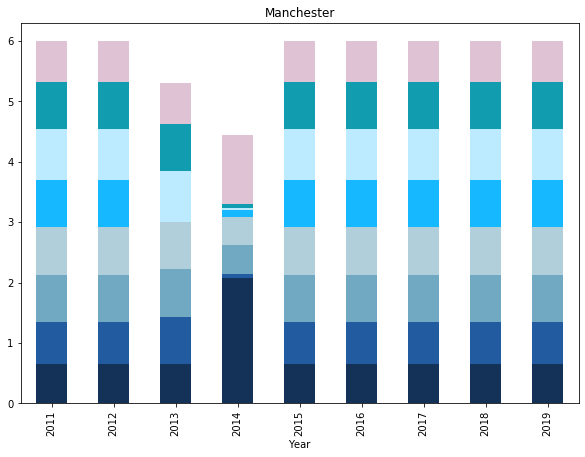

In [152]:
ax = pivot_business.loc[:,['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities', 'interiors']].plot.bar(stacked=True, figsize=(10,7), color=['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4'])
plt.title("Manchester")
ax.get_legend().remove()

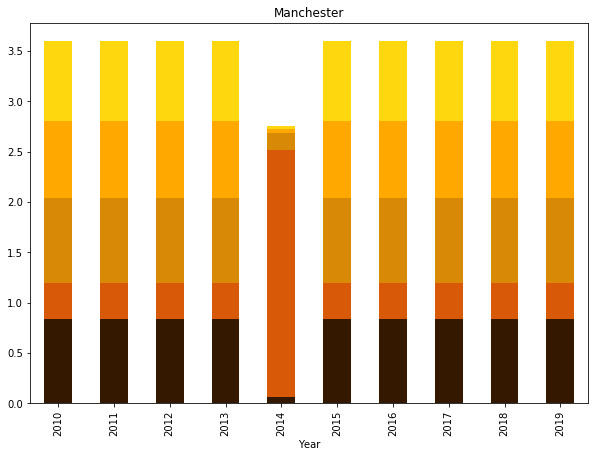

In [143]:
ax = pivot_social.loc[:,['meal','people', 'personality_host', 'sharing', 'talking']].plot.bar(stacked=True, figsize=(10,7), color=['#351800','#D85907','#D88A07','#FFA900','#FFD70F'])
plt.title("Manchester")
ax.get_legend().remove()

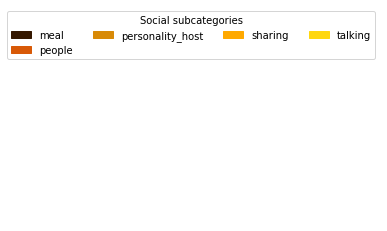

In [90]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Create a color palette
palette = dict(zip(['meal','people', 'personality_host', 'sharing', 'talking'], ['#351800','#D85907','#D88A07','#FFA900','#FFD70F']))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
plt.legend(title='Social subcategories', handles=handles, ncol=4)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()

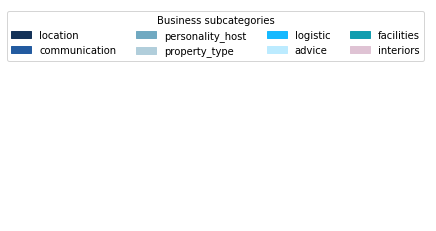

In [91]:
# Create a color palette
palette = dict(zip(['location', 'communication', 'personality_host', 'property_type', 'logistic', 'advice', 'facilities', 'interiors'], ['#143258','#235BA0','#70A9C1','#B1CEDB','#16B9FF','#BCEBFF','#119DAF', '#DFC3D4']))
# Create legend handles manually
handles = [mpl.patches.Patch(color=palette[x], label=x) for x in palette.keys()]
# Create legend
plt.legend(title='Business subcategories', handles=handles, ncol=4)
# Get current axes object and turn off axis
plt.gca().set_axis_off()
plt.show()